ASSIGNMENT -1




QUESTION 1.

In [37]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
img=cv2.imread('/content/drive/MyDrive/image.png')

In [47]:
img1 = cv2.imread('/image.png', cv2.IMREAD_GRAYSCALE)

In [39]:
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('off')

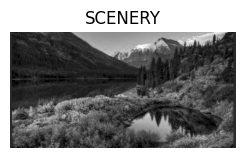

In [48]:
show(img1,2,2,2,'SCENERY')   #CALLING THE FUNCTION

# QUESTION 2

In [49]:
pip install opencv-python matplotlib numpy


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [51]:
def capture_image():
    cap = cv2.VideoCapture(0)  # Use 0 for default camera
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    ret, frame = cap.read()  # Capture a single frame
    cap.release()

    if not ret:
        print("Error: Could not capture an image.")
        return None

    # Convert BGR (OpenCV default) to RGB for displaying
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame_rgb


    #as because I am working on a google collab , which runs on a remote server , thus camera is not working.Thus the other changes I would like to apply on an image.

In [44]:
#TAKING THE SAME IMAGE=IMG

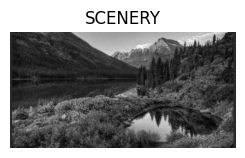

In [52]:
#GRAY FUNCTION
IMG_GREY=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
show(IMG_GREY,2,4,1,'SCENERY')

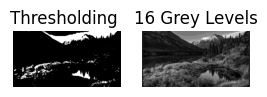

In [56]:
#threshold images
def threshold_image(image, thresh_value=127):
    # Convert the input image to grayscale inside the function
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY)
    return binary

def sixteen_greys(image):
    # Convert the input image to grayscale inside the function
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    step = 256 // 16  # Divide 0-255 into 16 regions
    reduced = (gray // step) * step  # Quantize the grayscale values
    return reduced

# Assuming 'img' is your input image
binary = threshold_image(img, thresh_value=127)  # Pass 'img' to the function
reduced = sixteen_greys(img)  # Pass 'img' to the function
show(binary,2,4,2,'Thresholding ')
show(reduced,2,4,3,'16 Grey Levels')



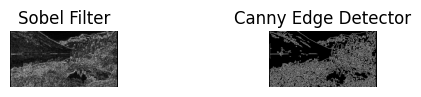

In [62]:
#soberl filter and canny edge detector
def sobel_filter(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    sobel = cv2.magnitude(sobel_x, sobel_y)  # Combine gradients
    sobel = np.uint8(sobel)  # Convert back to uint8 for display
    return sobel
def canny_edge(image, low_thresh=50, high_thresh=150):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, low_thresh, high_thresh)
    return edges
sobel=sobel_filter(img)
canny=canny_edge(img)
show(sobel,2,4,2,'Sobel Filter')
show(canny,2,4,4,'Canny Edge Detector')

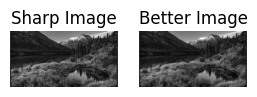

In [69]:
#removing noise using gaussian kernel
gaussian_kernel = (1/256) * np.array([[1,  4,  6,  4, 1],
                                      [4, 16, 24, 16, 4],
                                      [6, 24, 36, 24, 6],
                                      [4, 16, 24, 16, 4],
                                      [1,  4,  6,  4, 1]])

# Apply the Gaussian filter using cv2.filter2D
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
better_image = cv2.filter2D(gray, -1, gaussian_kernel)
show(better_image,2,4,3,'Better Image')

#sharpenig the image
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharp_image = cv2.filter2D(better_image, -1, sharpen_kernel)
show(sharp_image,2,4,2,'Sharp Image')


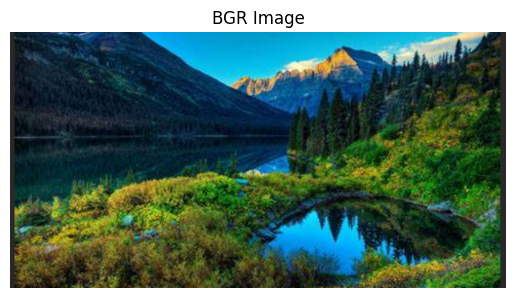

In [72]:
#RGB TO BGR
def rgb_to_bgr(image):
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return bgr_image

bgr_image = rgb_to_bgr(img)
show(bgr_image,1,1,1,'BGR Image')

# QUESTION 3

In [74]:
i1=cv2.imread('/content/1.jpg')
i2=cv2.imread('/content/2.jpg')
g1=cv2.cvtColor(i1,cv2.COLOR_RGB2GRAY)
g2=cv2.cvtColor(i2,cv2.COLOR_RGB2GRAY)

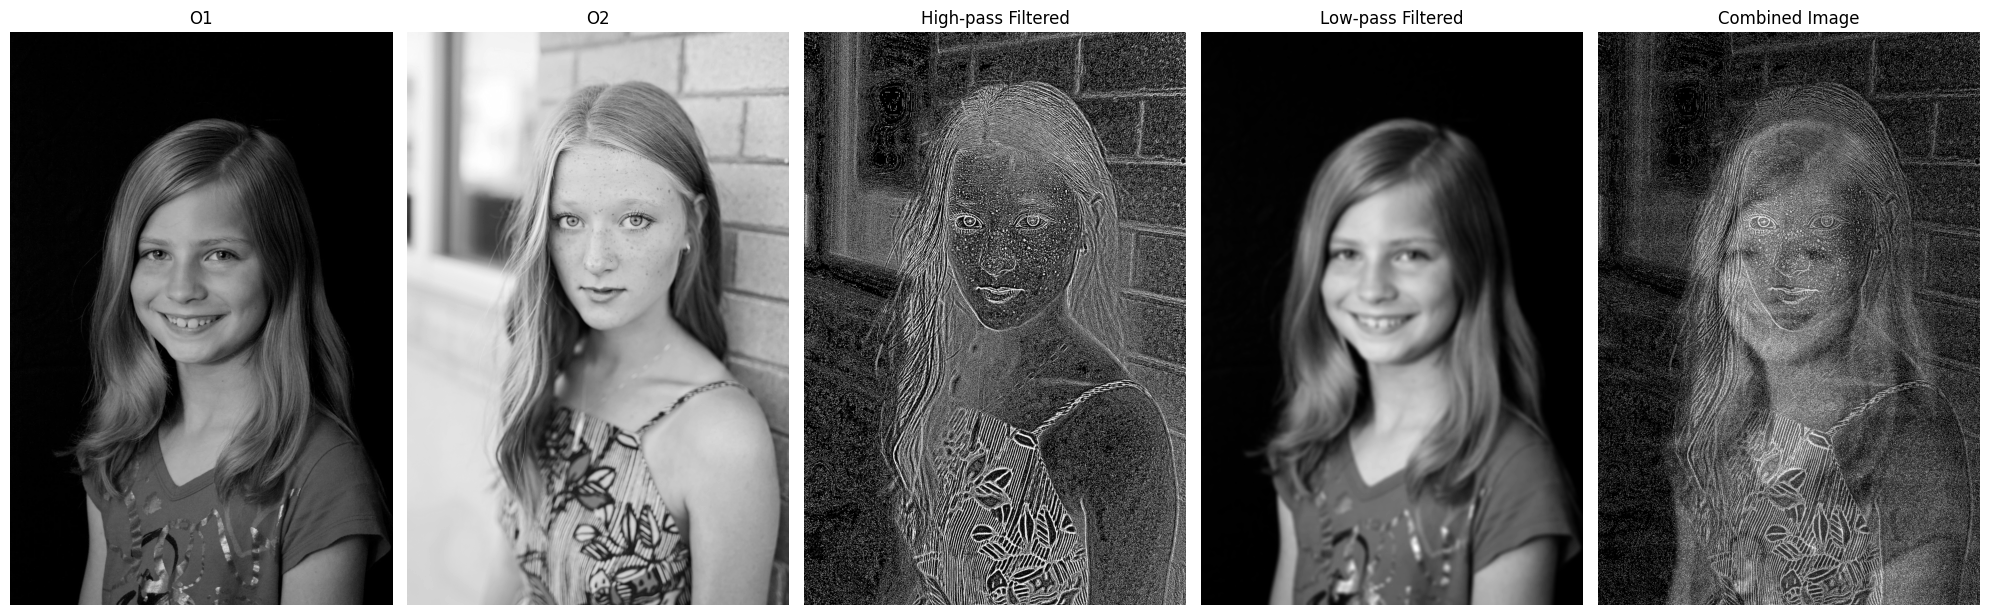

In [77]:
#high pass filter and low pass filter
# Gaussian kernel for low-pass filter
kernel_size = (15, 15)  # Kernel size for Gaussian filter
sigma = 5  # Standard deviation

# Apply low-pass filter (Gaussian blur)
low1 = cv2.GaussianBlur(g1, kernel_size, sigma)
low2= cv2.GaussianBlur(g2, kernel_size, sigma)
# Apply high-pass filter (by subtracting low-pass from original)
high1 = g1 - low1
high2= g2 - low2
high2_r = cv2.resize(high2, (low1.shape[1], low1.shape[0])) #we need equal dimensions for combining
# Combine high-pass and low-pass filtered images
combined = cv2.addWeighted(low1, 0.5, high2_r, 0.5, 0)

# Plot all five images
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# Original Image
axs[0].imshow(g1, cmap='gray')
axs[0].set_title("O1")
axs[0].axis('off')

axs[1].imshow(g2, cmap='gray')
axs[1].set_title("O2")
axs[1].axis('off')

# High-pass Filtered Image
axs[2].imshow(high2, cmap='gray')
axs[2].set_title("High-pass Filtered")
axs[2].axis('off')

# Low-pass Filtered Image
axs[3].imshow(low1, cmap='gray')
axs[3].set_title("Low-pass Filtered")
axs[3].axis('off')

# Combined Image
axs[4].imshow(combined, cmap='gray')
axs[4].set_title("Combined Image")
axs[4].axis('off')


plt.tight_layout()
plt.show()

# QUESTION 4


Not much as it was the first language I learned :0

# QUestion 5

In [110]:
from PIL import Image
import numpy as np
def dilemma(image_path):
  img=Image.open(image_path)
  img=img.convert("RGB")
  img_array=np.array(img) #CONVERT IMAGE TO array
  height, width, _ = img_array.shape
  #half them
  top_half = img_array[:height//2, :, :]
  bottom_half = img_array[height//2:, :, :]
  #check colours
  #indonesia has red up white down and viceversa in poland
  white_threshold = [200, 200, 200]
  red_threshold = [0, 0, 200]

  def dominance_check(region,color_threshold):
    color_match = np.all(region >= color_threshold, axis=-1)
    return np.sum(color_match) > region.size // 2
  topred = dominance_check(top_half, red_threshold)
  bottomwhite = dominance_check(bottom_half, white_threshold)
  topwhite = dominance_check(top_half, white_threshold)
  bottomred = dominance_check(bottom_half, red_threshold)

  if topred and bottomwhite:
    return "Indonesia"
  elif topwhite and bottomred:
    return "Poland"
  else:
    return "Unknown"


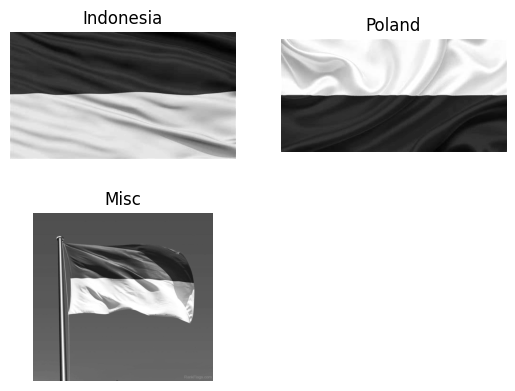

In [105]:
ind=cv2.imread('/content/indo.jpg',cv2.IMREAD_GRAYSCALE)
pol=cv2.imread('/content/pol.jpg',cv2.IMREAD_GRAYSCALE)
misc=cv2.imread('/content/miscc.jpg',cv2.IMREAD_GRAYSCALE)
show(ind,2,2,1,'Indonesia')
show(pol,2,2,2,'Poland')
show(misc,2,2,3,'Misc')

In [111]:
image_path = "/content/indo.jpg" # Replace with the path to the image
result = dilemma(image_path)
print(result)

Unknown


[212  29  49]


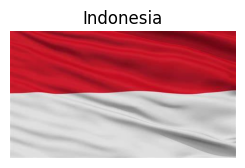

In [113]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open("/content/indo.jpg")
img = img.convert("RGB")  # Ensure the image is in RGB format
img_array = np.array(img)
show(img_array,2,2,1,'Indonesia')
# Print out the RGB value of a pixel to ensure correct channel order
print(img_array[0, 0])  # Prints the RGB values of the top-left pixel


In [128]:
from PIL import Image
import numpy as np

def is_flag_of_indonesia_or_poland(image_path):
    # Load the image
    img = Image.open(image_path)
    img = img.convert("RGB")  # Ensure the image is in RGB format

    # Convert the image to a numpy array for easier processing
    img_array = np.array(img)

    # Get the image dimensions
    height, width, _ = img_array.shape

    # Split the image into top and bottom halves
    top_half = img_array[:height//2, :, :]
    bottom_half = img_array[height//2:, :, :]

    # Define a general color range for red and white (allowing some flexibility)
    # For Red (dominance in Red channel)
    red_lower = [100, 0, 0]  # Low threshold for red
    red_upper = [255, 100, 100]  # High threshold for red
    # For White (dominance in all channels)
    white_lower = [180, 180, 180]  # Relaxed range for white (slightly lower threshold)
    white_upper = [255, 255, 255]  # Maximum values for white

    # Function to check if a region is predominantly a specific color
    def is_predominantly_color(region, color_lower, color_upper):
        # Create a mask for pixels within the specified color range
        mask = np.all((region >= color_lower) & (region <= color_upper), axis=-1)
        return np.sum(mask) > region.size // 2  # If more than half the pixels match the color range

    # Check if the top half is predominantly red and bottom half predominantly white for Indonesia
    top_is_red = is_predominantly_color(top_half, red_lower, red_upper)
    bottom_is_white = is_predominantly_color(bottom_half, white_lower, white_upper)

    # Check if the top half is predominantly white and bottom half predominantly red for Poland
    top_is_white = is_predominantly_color(top_half, white_lower, white_upper)
    bottom_is_red = is_predominantly_color(bottom_half, red_lower, red_upper)

    # Decision based on the colors
    if top_is_red and bottom_is_white:
        return "Indonesia flag detected"
    elif top_is_white and bottom_is_red:
        return "Poland flag detected"




In [129]:
image_path = "/content/try.jpg"  # Replace with the path to your image
result = is_flag_of_indonesia_or_poland(image_path)
print(result)

None
